# Import Modules

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the Datasets

In [3]:
peopleFilepath = './Data/pickledPeople.pkl'
voteFilepath = './Data/pickledVotes_unpacked.pkl'
routeFilepath = './Data/pickledRoutes_unpacked.pkl'

people = pd.read_pickle(peopleFilepath)
votes = pd.read_pickle(voteFilepath)
routes = pd.read_pickle(routeFilepath)

# Define function to find people with common routes

In [94]:
# Function to find what breadcrumb the route is in
def find_bc(areaUrl, routes):
    print("Finding the Breadcrumb for", routes.loc[areaUrl]['name'])
    bc = ['bc1', 'bc2', 'bc3']
    for i in range(len(routes)):
        for j in bc:
            if routes.iloc[i][j]==areaUrl:
                print(routes.loc[areaUrl]['name'], "breadcrumb is:", j)
                return j
    

# Function to find all common people between N most-popular routes
def findCommonPeople(areaUrl, breadcrumbTier, nRoutes, routes, people, verbose=True):
    areaRoutes = routes.loc[routes[breadcrumbTier]==areaUrl]
    areaRoutes = areaRoutes.sort_values('numQualityVotes', ascending=False)
    areaRoutes = areaRoutes[:nRoutes]
    
    subPeople = set([])
    
    # Filter the people dataset to only include those with at least nRoutes starRatings
    people = people.loc[people['numStarRatings']>=nRoutes*5]
            
    for i in range(len(areaRoutes)):
        tempSet=[]
        if verbose:
            print("Parsing peopleDF for route", i+1, "of", nRoutes)
        for j in range(len(people)):
            if areaRoutes.index[i] in people.iloc[j]['starRatings']:
                tempSet.append(people.index[j])
                if verbose:
                    print(j/len(people), end='\r')        
        if i==0:
            subPeople=set(tempSet)
        else:
            subPeople = subPeople.intersection(set(tempSet))
            
    if verbose:
        print(len(subPeople),"have climbed the", nRoutes, "most-rated climbs at", areaUrl) 
        print()

    return subPeople

# Function for aesthetics
def print_header(a, areaUrlList):
    if len(areaUrlList) >= 10 and a < 10:
        print()
        print("##########################")
        print("## STARTING AREA", a+1, "/", len(areaUrlList), "##")
        print("##########################")
        print()
        
    elif len(areaUrlList) >= 10 and a >=10:
        print()
        print("###########################")
        print("## STARTING AREA", a+1, "/", len(areaUrlList), "##")
        print("###########################")
        print()
        
    else:
        print()
        print("#########################")
        print("## STARTING AREA", a+1, "/", len(areaUrlList), "##")
        print("#########################")
        print()
        

# Function to plot a range of areas and number of routes that people have in common
def plot_num_common_people(areaUrlList, breadcrumbList, labelList, nRoutesLower=1, nRoutesUpper=10, routes=routes, people=people, verbose=True):
    
    areas = []
    for a in range(len(areaUrlList)):
        
        # Aesthetics
        print_header(a, areaUrlList)
        
        numPeople = []
        for i in range(nRoutesLower, nRoutesUpper+1):
            print("PERFORMING ITERATION", i-nRoutesLower+1, "OF", nRoutesUpper-nRoutesLower+1)
            numPeople.append(len(findCommonPeople(areaUrlList[a], breadcrumbList[a], i, routes, people, verbose)))
        areas.append(numPeople)
        
    # Plot the areas
    fig, ax = plt.subplots(figsize=(10,6))
    x = range(nRoutesLower, nRoutesUpper+1)
    
    for i in range(len(areas)):
        ax.plot(x, areas[i], '-o', label=labelList[i])
    ax.set_title("# Routes vs # Common Users")
    ax.set_xlabel("Number of Routes", fontsize=14)
    ax.set_ylabel("Number of People Who Rated All Climbs", fontsize=14)
    ax.set_xticks(list(range(nRoutesLower, nRoutesUpper+1)))
    ax.legend()
    
    plt.show()
    

##########################
## STARTING AREA 1 / 12 ##
##########################

PERFORMING ITERATION 1 OF 6
PERFORMING ITERATION 2 OF 6
PERFORMING ITERATION 3 OF 6
PERFORMING ITERATION 4 OF 6
PERFORMING ITERATION 5 OF 6
PERFORMING ITERATION 6 OF 6
##########################
## STARTING AREA 2 / 12 ##
##########################

PERFORMING ITERATION 1 OF 6
PERFORMING ITERATION 2 OF 6
PERFORMING ITERATION 3 OF 6
PERFORMING ITERATION 4 OF 6
PERFORMING ITERATION 5 OF 6
PERFORMING ITERATION 6 OF 6
##########################
## STARTING AREA 3 / 12 ##
##########################

PERFORMING ITERATION 1 OF 6
PERFORMING ITERATION 2 OF 6
PERFORMING ITERATION 3 OF 6
PERFORMING ITERATION 4 OF 6
PERFORMING ITERATION 5 OF 6
PERFORMING ITERATION 6 OF 6
##########################
## STARTING AREA 4 / 12 ##
##########################

PERFORMING ITERATION 1 OF 6
PERFORMING ITERATION 2 OF 6
PERFORMING ITERATION 3 OF 6
PERFORMING ITERATION 4 OF 6
PERFORMING ITERATION 5 OF 6
PERFORMING ITERATION 6 OF 6


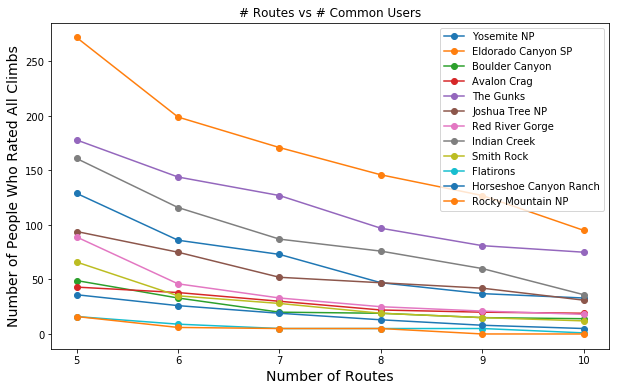

In [97]:
# Areas to search
areaList = ['https://www.mountainproject.com/area/105833381/yosemite-national-park',
            'https://www.mountainproject.com/area/105744246/eldorado-canyon-sp',
            'https://www.mountainproject.com/area/105744222/boulder-canyon',
            'https://www.mountainproject.com/area/105745528/avalon',
           'https://www.mountainproject.com/area/105798167/the-gunks',
           'https://www.mountainproject.com/area/105720495/joshua-tree-national-park',
           'https://www.mountainproject.com/area/105841134/red-river-gorge',
           'https://www.mountainproject.com/area/105716763/indian-creek',
           'https://www.mountainproject.com/area/105788989/smith-rock',
           'https://www.mountainproject.com/area/105797700/flatirons',
           'https://www.mountainproject.com/area/105903004/horseshoe-canyon-ranch',
           'https://www.mountainproject.com/area/105744460/rmnp-rock']

# List of their breadcrumb positions
bcList = ['bc2', 'bc3', 'bc3', 'bc4', 'bc2', 'bc2', 'bc2', 'bc3', 'bc3', 'bc3', 'bc2', 'bc3']

# List of area labels
labelList = ['Yosemite NP',
             'Eldorado Canyon SP',
             'Boulder Canyon',
             'Avalon Crag',
             'The Gunks',
             'Joshua Tree NP',
             'Red River Gorge',
             'Indian Creek',
            'Smith Rock',
            'Flatirons',
            'Horseshoe Canyon Ranch',
            'Rocky Mountain NP']

plot_num_common_people(areaList, bcList, labelList, nRoutesLower=5, verbose=False)


##########################
## STARTING AREA 1 / 12 ##
##########################

PERFORMING ITERATION 1 OF 16
PERFORMING ITERATION 2 OF 16
PERFORMING ITERATION 3 OF 16
PERFORMING ITERATION 4 OF 16
PERFORMING ITERATION 5 OF 16
PERFORMING ITERATION 6 OF 16
PERFORMING ITERATION 7 OF 16
PERFORMING ITERATION 8 OF 16
PERFORMING ITERATION 9 OF 16
PERFORMING ITERATION 10 OF 16
PERFORMING ITERATION 11 OF 16
PERFORMING ITERATION 12 OF 16
PERFORMING ITERATION 13 OF 16
PERFORMING ITERATION 14 OF 16
PERFORMING ITERATION 15 OF 16
PERFORMING ITERATION 16 OF 16
##########################
## STARTING AREA 2 / 12 ##
##########################

PERFORMING ITERATION 1 OF 16
PERFORMING ITERATION 2 OF 16
PERFORMING ITERATION 3 OF 16
PERFORMING ITERATION 4 OF 16
PERFORMING ITERATION 5 OF 16
PERFORMING ITERATION 6 OF 16
PERFORMING ITERATION 7 OF 16
PERFORMING ITERATION 8 OF 16
PERFORMING ITERATION 9 OF 16
PERFORMING ITERATION 10 OF 16
PERFORMING ITERATION 11 OF 16
PERFORMING ITERATION 12 OF 16
PERFORMING ITE

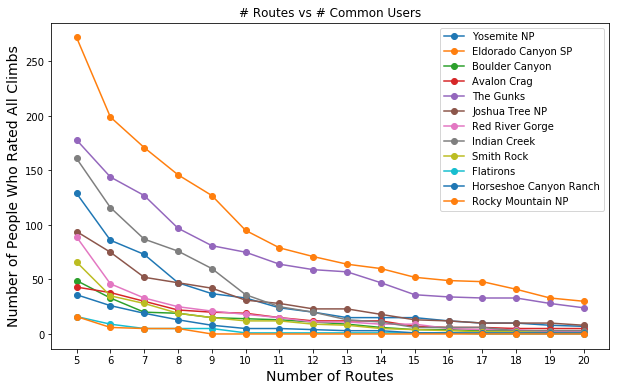

In [98]:
plot_num_common_people(areaList, bcList, labelList, nRoutesLower=5, nRoutesUpper=20, verbose=False)